In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [ ]:
data = ('Equities_ETFTradeFile_20230612_1.csv')
df = pd.read_csv(data, sep=';')

display(df)

In [ ]:
df.info()

In [56]:
df['RptDt'] = pd.to_datetime(df['RptDt'], format='%Y-%m-%d')
df['RptDt'] = df['RptDt'].sort_values(by='RptDtS', ascending=True)


df_tratadoS = df[df['FrstPric'] >= 35.00]
df['FrstPric'] = df['FrstPric'].sort_values(by='FrstPricS', ascending=True)

display(df)

,RptDt,TckrSymb,SctyId,SctySrc,MktIdrCd,FrstPric,MinPric,MaxPric,LastPric,OscnPctg,IndxVal,TradAvrgPric,PrvsDayClsgPric,DataSts
0,2023-06-12,AGRI,200000863486,8,BVMF,46.94,46.85,47.35,47.26,0.0070,47.26,47.07,46.93,I
1,2023-06-12,ALSO,200001037160,8,BVMF,10.73,10.68,10.85,10.83,0.0140,10.83,10.75,10.68,I
2,2023-06-12,BBOV,200000480996,8,BVMF,60.52,60.36,60.88,60.68,0.0028,60.68,60.64,60.51,I
3,2023-06-12,BBSD,10026185,8,BVMF,95.06,94.62,95.60,95.47,0.0049,95.47,95.27,95.00,I
4,2023-06-12,BCIC,200001070068,8,BVMF,115.73,115.51,116.45,116.18,0.0039,116.18,116.15,115.72,I
5,2023-06-12,BDEF,200001070193,8,BVMF,113.62,113.32,114.91,114.56,0.0084,114.56,114.30,113.60,I
6,2023-06-12,BDOM,200000952526,8,BVMF,102.19,102.19,103.31,103.06,0.0085,103.06,102.86,102.19,I
7,2023-06-12,BMMT,200001070019,8,BVMF,101.19,100.82,101.63,101.50,0.0031,101.50,101.31,101.18,I
8,2023-06-12,BOVA,200001030806,8,BVMF,113.28,112.98,113.95,113.58,0.0030,113.58,113.52,113.24,I
9,2023-06-12,BOVB,200000295865,8,BVMF,118.15,117.83,118.87,118.47,0.0027,118.47,118.41,118.15,I


C:\Users\larag\AppData\Local\Temp\ipykernel_3852\3621776215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_TckrSymb['year'] = df.RptDt.dt.year
C:\Users\larag\AppData\Local\Temp\ipykernel_3852\3621776215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_TckrSymb.drop(columns='RptDt', inplace=True)
C:\Users\larag\AppData\Local\Temp\ipykernel_3852\3621776215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

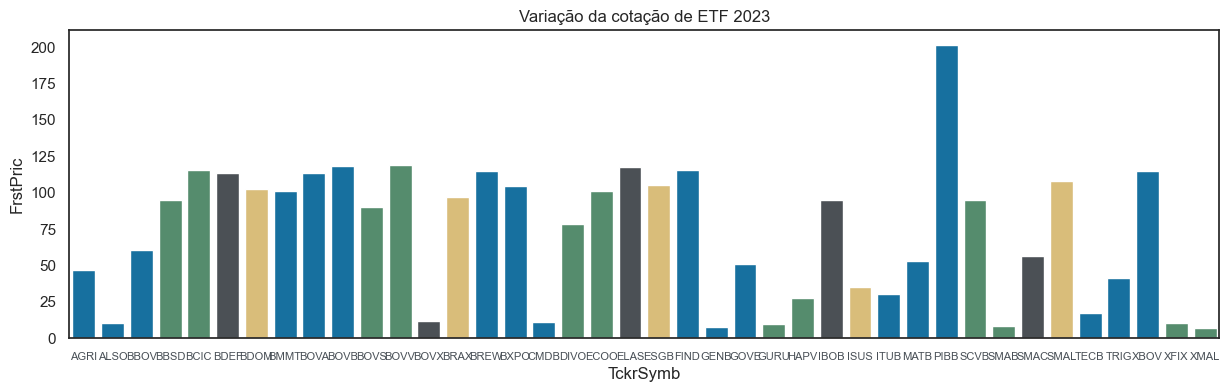

In [50]:
df_year_TckrSymb = df[['RptDt','TckrSymb','FrstPric']]
df_year_TckrSymb['year'] = df.RptDt.dt.year
df_year_TckrSymb.drop(columns='RptDt', inplace=True)

#Area do grafico
fig, ax = plt.subplots(figsize=(20,4))
fig.subplots_adjust(right=0.7)
sns.set_theme(style='white')

#Paleta de cores
cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA2, AMARELO1]

#Dados no grafico
ax = sns.barplot(data=df_year_TckrSymb, x='TckrSymb', y='FrstPric', palette= cores)

#Personalizando o gráfico
ax.set_title('Variação da cotação de ETF 2023')
ax.xaxis.set_tick_params(labelsize=8, labelcolor=CINZA2)


#display(df_year_TckrSymb)